# Labolatorium nr 7

## Import bibliotek oraz ich konfiguracja

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

# Matplotlib settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

## Zadanie 1 - metoda potęgowa

In [191]:
# https://www.cs.cmu.edu/afs/cs/academic/class/15859n-f16/Handouts/TrefethenBau/RayleighQuotient-27.pdf
def power_iteration(A, num_iterations=1000):
    b_k = np.random.rand(A.shape[1])
    b_k = b_k/np.linalg.norm(b_k)

    for _ in range(num_iterations):
        b_k1 = np.dot(A, b_k)
        b_k1_norm = np.linalg.norm(b_k1)
        b_k = b_k1 / b_k1_norm
        l = b_k.T.dot(A).dot(b_k)

    return l, b_k

In [169]:
A = np.random.rand(3,3)

power_value, power_vector = power_iteration(A)
eig_value, eig_vector = np.linalg.eig(A)

print(f"My implementation: {power_value} {power_vector}")
print(f"Numpy implementation: {eig_value} {eig_vector}")

My implementation: 1.358728817236194 [0.47906098 0.19109667 0.85672787]
Numpy implementation: [1.35872882 0.22037177 0.53668396] [[-0.47906098 -0.87020403  0.852218  ]
 [-0.19109667 -0.0587176  -0.51124001]
 [-0.85672787  0.48918012  0.1111671 ]]


In [170]:
matrix_size = np.arange(10, 1000, 10)

power_time = []
eig_time = []

for size in matrix_size:
    A = np.random.rand(size, size)

    start = time.time()
    power_iteration(A)
    power_time.append(time.time() - start)

    start = time.time()
    np.linalg.eig(A)
    eig_time.append(time.time() - start)

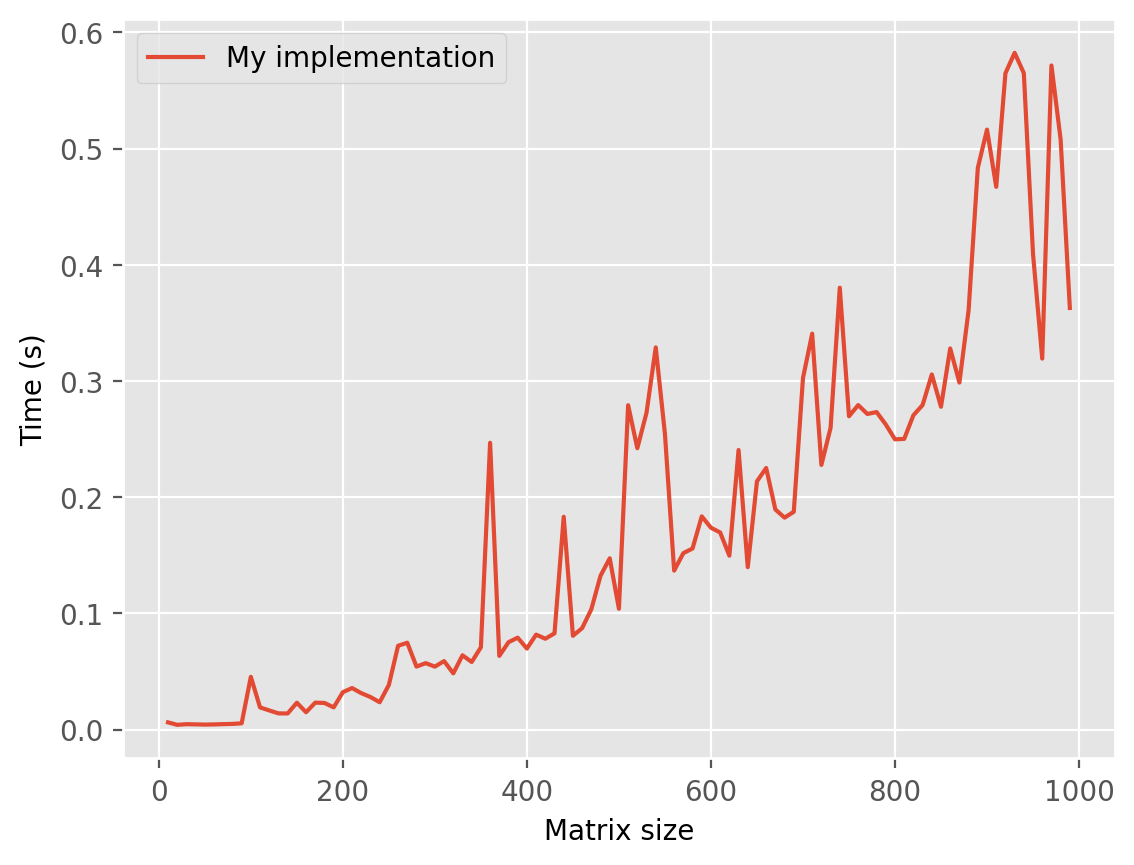

In [184]:
plt.xlabel('Matrix size')
plt.ylabel('Time (s)')
p1=plt.plot(matrix_size, power_time, label='My implementation')
plt.legend(handles=[p1[0]])
plt.show()

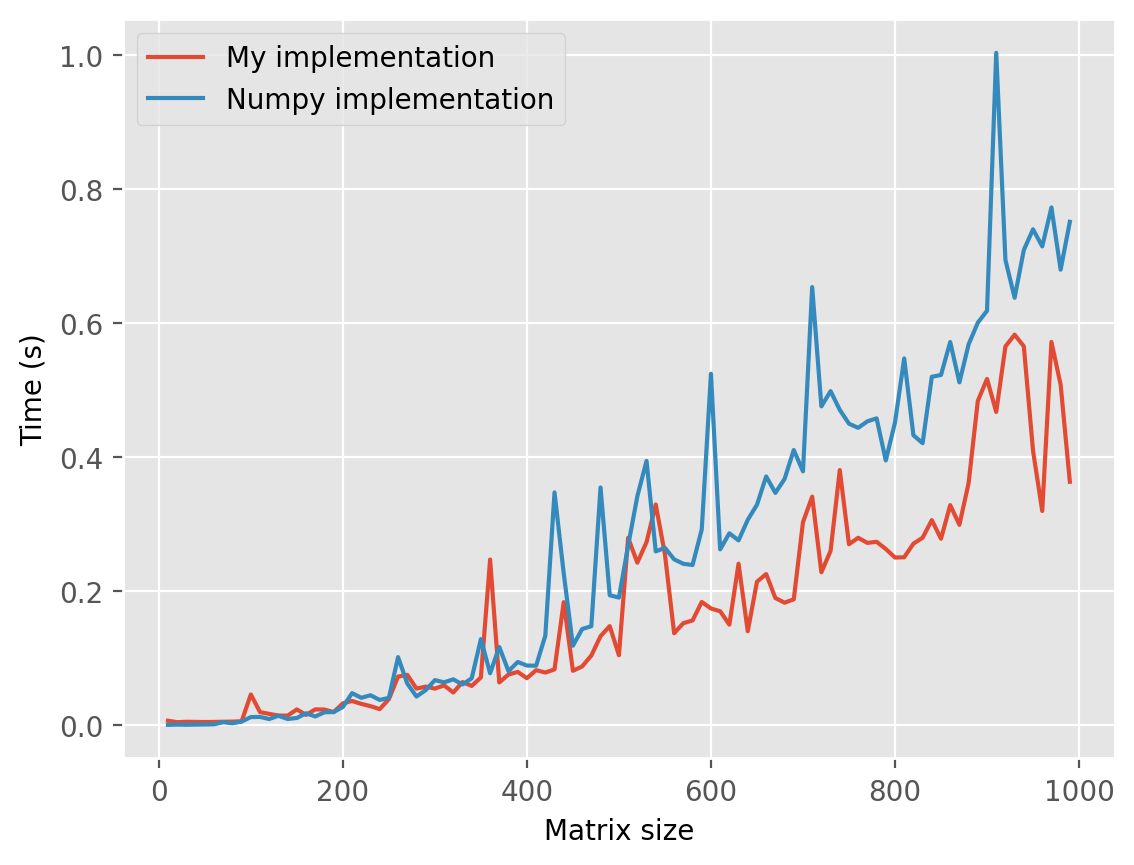

In [172]:
plt.xlabel('Matrix size')
plt.ylabel('Time (s)')
p1=plt.plot(matrix_size, power_time, label='My implementation')
p2=plt.plot(matrix_size, eig_time, label='Numpy implementation')
plt.legend(handles=[p1[0], p2[0]])
plt.show()

## Zadanie 2 - metoda potęgowa

In [189]:
# https://www.cs.cmu.edu/afs/cs/academic/class/15859n-f16/Handouts/TrefethenBau/RayleighQuotient-27.pdf
def inverse_iteration(A, mu, num_iterations = 1000):
    b_k = np.random.randn(A.shape[0])
    b_k /= np.linalg.norm(b_k)

    for _ in range(num_iterations):
        b_k1 = np.linalg.inv(A-mu*np.eye(A.shape[0])).dot(b_k)
        b_k  = b_k1 / np.linalg.norm(b_k1)
        l = b_k.T.dot(A).dot(b_k)
    return l, b_k

In [190]:
A = np.random.rand(3,3)

power_value, power_vector = inverse_iteration(A, 3)
eig_value, eig_vector = np.linalg.eig(A)

print(f"My implementation: {power_value} {power_vector}")
print(f"Numpy implementation: {eig_value} {eig_vector}")

My implementation: 1.4388805563476075 [0.369461   0.68972388 0.62271947]
Numpy implementation: [ 1.43888056  0.52545877 -0.27054972] [[-0.369461   -0.42355638 -0.09640118]
 [-0.68972388  0.76846364 -0.6932317 ]
 [-0.62271947  0.47964948  0.71423849]]


## Zadanie 3 - metoda Rayleigha

In [197]:
# https://www.cs.cmu.edu/afs/cs/academic/class/15859n-f16/Handouts/TrefethenBau/RayleighQuotient-27.pdf
def rayleigh_quotient_iteration(A, num_iterations = 1000):
    b_k = np.random.randn(A.shape[0])
    b_k /= np.linalg.norm(b_k)
    
    l = b_k.T.dot(A).dot(b_k)

    for _ in range(num_iterations):
        b_k1 = np.linalg.inv(A-l*np.eye(A.shape[0])).dot(b_k)
        b_k  = b_k1 / np.linalg.norm(b_k1)
        l = b_k.T.dot(A).dot(b_k)
    return l, b_k

In [205]:
A = np.random.rand(3,3)

power_value, power_vector = rayleigh_quotient_iteration(A)
eig_value, eig_vector = np.linalg.eig(A)

print(f"My implementation: {power_value} {power_vector}")
print(f"Numpy implementation: {eig_value} {eig_vector}")

My implementation: 1.8426208662737704 [-0.64935535 -0.69240943 -0.31449454]
Numpy implementation: [ 1.84262087 -0.58951559  0.38803011] [[-0.64935535 -0.59925376  0.23426813]
 [-0.69240943  0.26391734 -0.85894623]
 [-0.31449454  0.75580591  0.45533484]]
